# Simulating Two Cars Interacting on a Road Network

This notebook demonstrates a simple simulation of two cars interacting on a road network using an agent-based modeling approach. The simulation is built using the Mesa-Geo library and aims to provide insights into how cars behave and interact with each other on the road.

## Introduction

In this simulation, we will create a road network and place two cars on it. Each car will be represented as an agent with its own behavior and movement rules. We will then simulate how these two cars interact with each other and with the road network.

## Goals

- Create a realistic road network using Mesa-Geo.
- Define the behavior of two cars and how they interact with each other.
- Simulate the movement of the cars and visualize their interaction.

## Methodology

1. Create a road network: Generate a realistic road network using Mesa-Geo.
2. Define car agents: Create agents to represent the two cars, each with its own behavior.
3. Implement interaction rules: Define how the cars interact with each other and the road network.
4. Simulate movement: Simulate the movement of the cars over time.
5. Visualize the simulation: Visualize the cars' movement and interaction on the road network


# Importing  libraries 

In [1]:
import mesa
import mesa_geo as mg
import geopandas as gpd
from shapely.geometry import Point
import random

# Initialization of GIS based agents 

In [2]:
# GeoSpace to hold GIS-based agents
class TrafficGeoSpace(mg.GeoSpace):
    def __init__(self):
        super().__init__(crs="EPSG:3857")  # Set CRS explicitly


# Vehicle Agent
class VehicleAgent(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs="EPSG:3857"):
        super().__init__(unique_id, model, geometry, crs)
        self.speed = random.uniform(10, 20)  # Speed in arbitrary units

    def step(self):
        # Example behavior: move randomly
        new_position = self.random_move()
        self.geometry = new_position

    def random_move(self):
        x, y = self.geometry.xy
        x_new = x[0] + random.uniform(-0.001, 0.001)
        y_new = y[0] + random.uniform(-0.001, 0.001)
        return Point(x_new, y_new)

# Defining a Traffic Model

In [3]:
# Traffic Model
class TrafficModel(mesa.Model):
    def __init__(self, road_network_file):
        super().__init__()  # Explicitly initialize the Model
        self.schedule = mesa.time.RandomActivation(self)
        self.space = TrafficGeoSpace()
        self.load_roads(road_network_file)
        self.create_vehicles(50)  # Number of vehicles
        self.vehicle_positions = []  # Store vehicle positions

    def load_roads(self, road_network_file):
        roads = gpd.read_file(road_network_file)
        for idx, road in roads.iterrows():
            road_agent = mg.GeoAgent(idx, self, road.geometry, roads.crs)
            self.space.add_agents(road_agent)

    def create_vehicles(self, num_vehicles):
        for i in range(num_vehicles):
            x, y = (
                random.uniform(-10, 10),
                random.uniform(-10, 10),
            )  # Random start positions
            vehicle = VehicleAgent(i, self, Point(x, y))
            self.space.add_agents(vehicle)
            self.schedule.add(vehicle)

    def step(self):
        self.schedule.step()
        self.collect_data()  # Collect data after each step

    def collect_data(self):
        positions = [
            (agent.unique_id, agent.geometry.x, agent.geometry.y)
            for agent in self.schedule.agents
            if isinstance(agent, VehicleAgent)
        ]
        self.vehicle_positions.append(positions)


# Running the Model
road_network_file = "roads.shp"  # Update this path
model = TrafficModel(road_network_file)

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/mesa_geo/geospace.py:169: UserWarning: Converting GeoAgent from crs EPSG:4326 to the crs of TrafficGeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  self._check_agent(agent)


In [4]:
for i in range(100):  # Run for 100 steps
    model.step()

In [5]:
import folium

# Create a map centered around the initial positions of the vehicles
map_center = [0, 0]  # Change this to your actual center coordinates if needed
mymap = folium.Map(location=map_center, zoom_start=12)

# Add vehicle positions to the map
for step in model.vehicle_positions:
    for unique_id, x, y in step:
        folium.Marker(location=[y, x], popup=f"Vehicle {unique_id}").add_to(mymap)

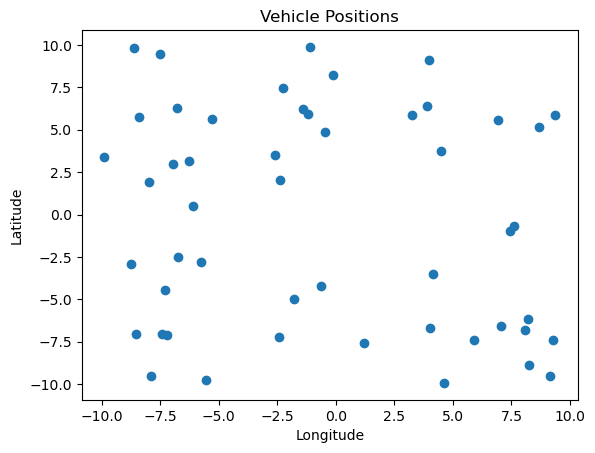

In [6]:
import matplotlib.pyplot as plt


def plot_vehicles(model):
    x = [
        agent.geometry.x
        for agent in model.space.agents
        if isinstance(agent, VehicleAgent)
    ]
    y = [
        agent.geometry.y
        for agent in model.space.agents
        if isinstance(agent, VehicleAgent)
    ]
    plt.scatter(x, y)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Vehicle Positions")
    plt.show()


plot_vehicles(model)

# Line Represntaion of Sample Road

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_15118/566345046.py:10: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


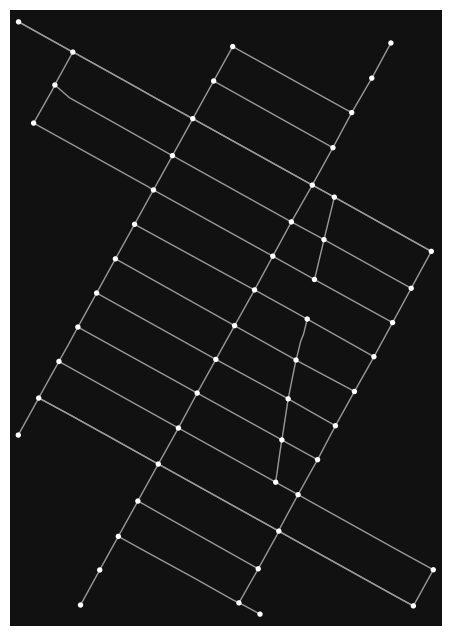

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
import osmnx as ox

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Use the bbox parameter
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Check if the graph is already simplified before simplifying
if not G.graph.get("simplified", False):
    G = ox.simplify_graph(G)

# Plot the graph
ox.plot_graph(G)

# Scatter presentation of Road Networks 

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_15118/2754317047.py:12: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


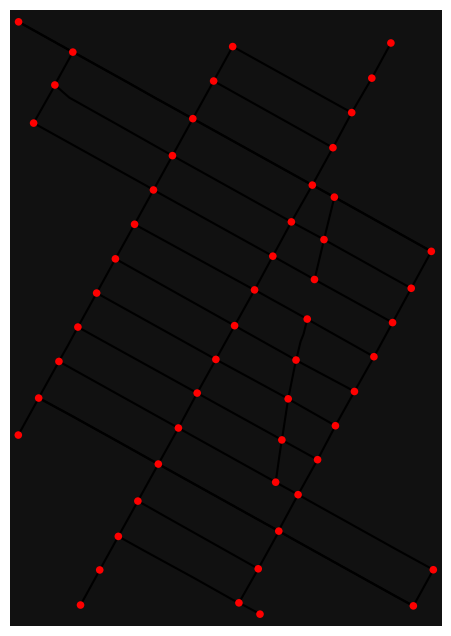

In [8]:
import osmnx as ox
import matplotlib.pyplot as plt

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
bbox = (north, south, east, west)
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Check if the graph is already simplified before simplifying
if not G.graph.get("simplified", False):
    G = ox.simplify_graph(G)

# Plot the graph
fig, ax = ox.plot_graph(
    G, node_size=30, node_color="r", edge_linewidth=1.5, edge_color="black"
)
plt.show()

# Result 1 
with one object or car

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_15118/4076012628.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


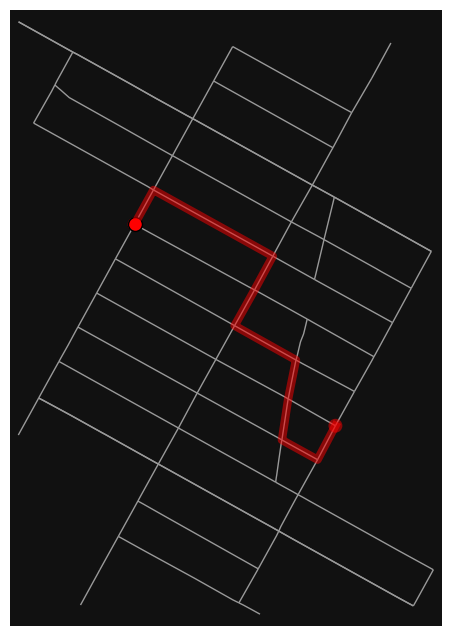

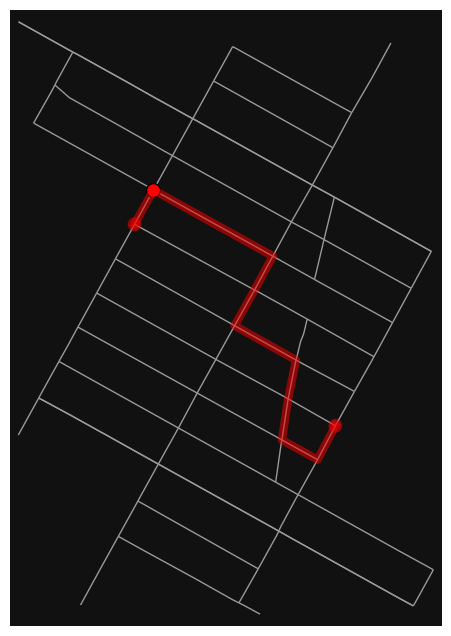

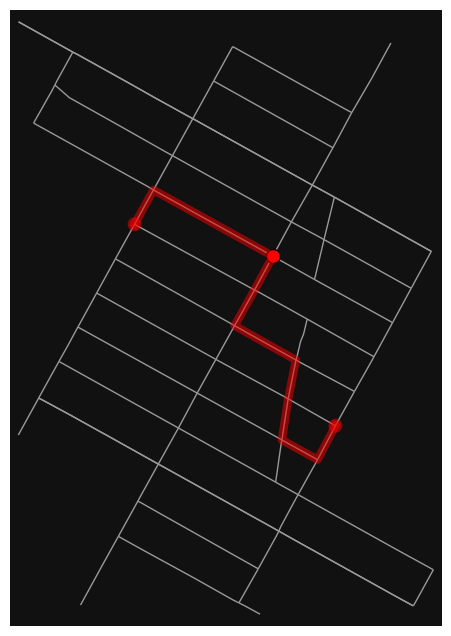

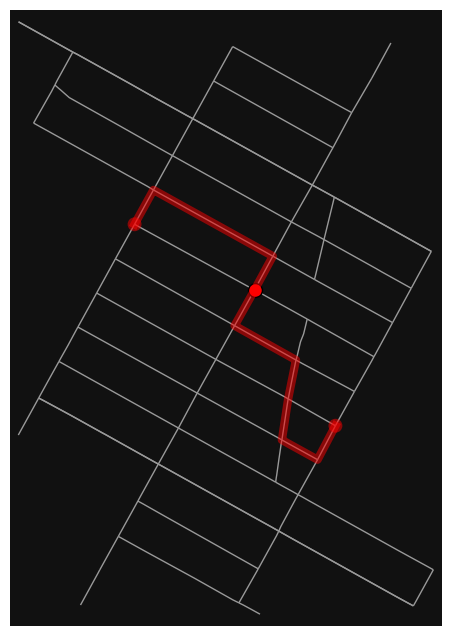

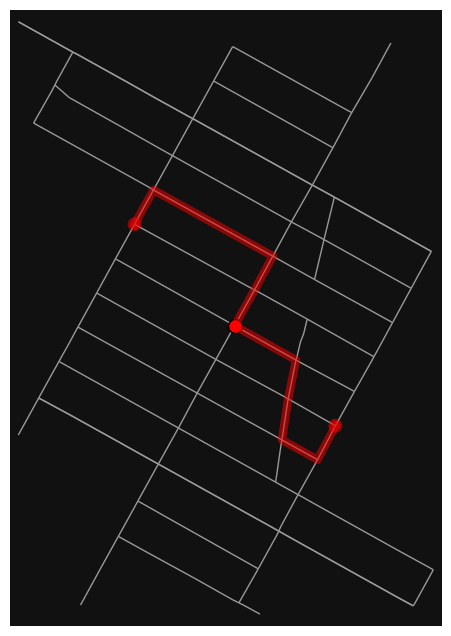

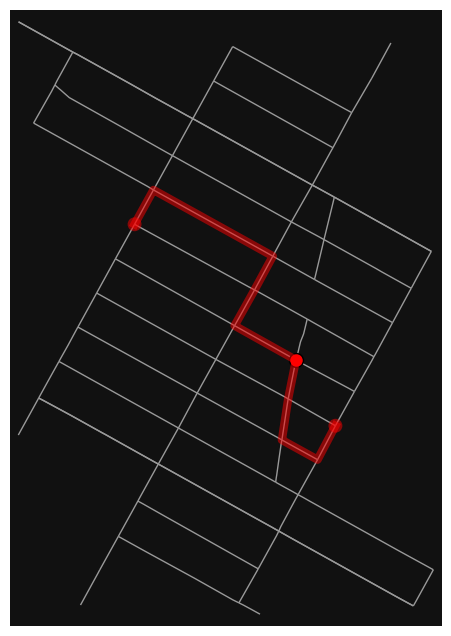

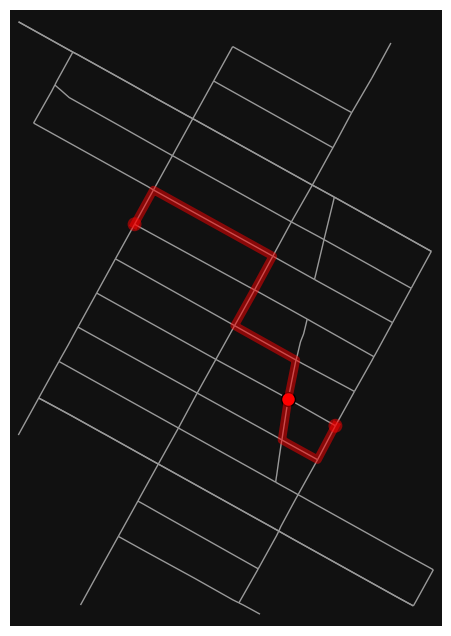

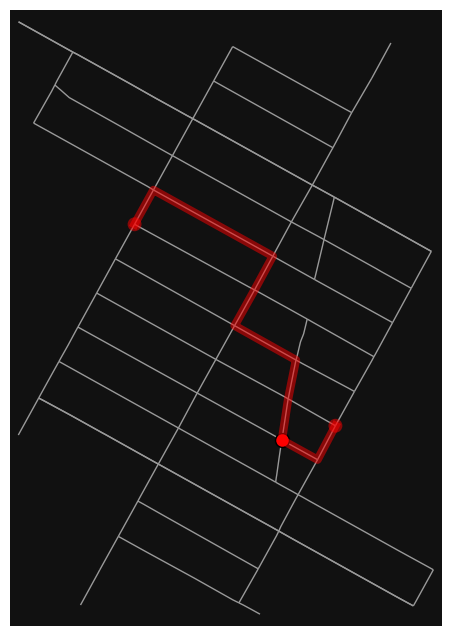

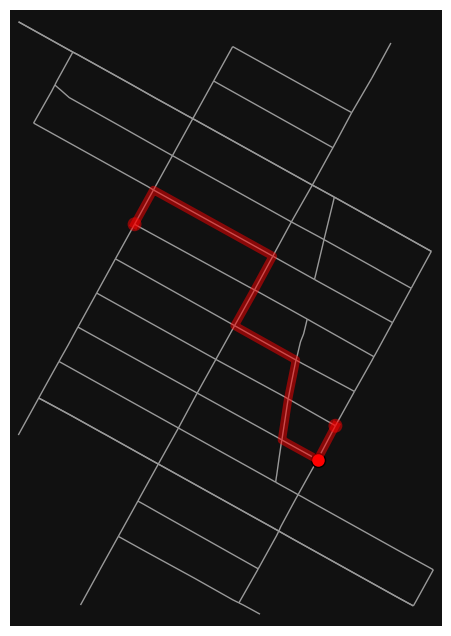

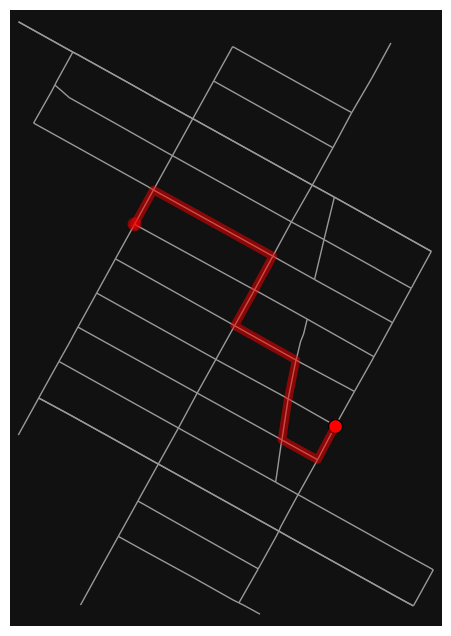

Vehicle has reached the destination.


In [9]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import time

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Get the nodes closest to the start and end points
start_point = (40.755, -73.990)  # Example start point
end_point = (40.751, -73.985)  # Example end point
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate the shortest path
route = nx.shortest_path(G, source=start_node, target=end_node, weight="length")


# Function to plot the graph and the vehicle's position
def plot_vehicle(G, route, vehicle_position):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, show=False, close=False
    )
    ax.scatter(
        vehicle_position[1], vehicle_position[0], c="red", s=100, edgecolors="black"
    )
    plt.show()


# Simulate the vehicle's movement along the route
for node in route:
    vehicle_position = (G.nodes[node]["y"], G.nodes[node]["x"])
    plot_vehicle(G, route, vehicle_position)
    time.sleep(1)  # Delay to simulate movement

print("Vehicle has reached the destination.")

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_15118/3940071347.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


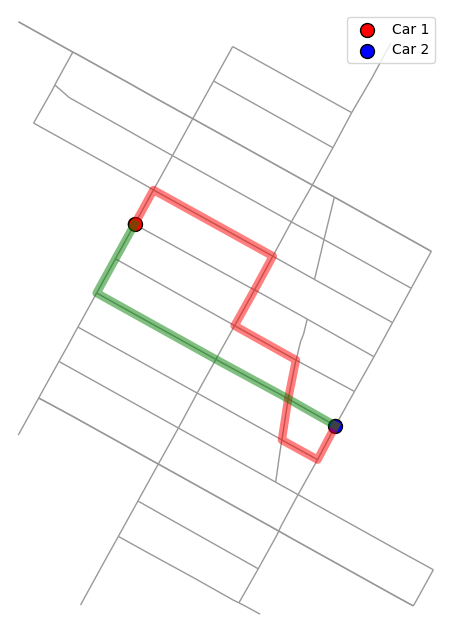

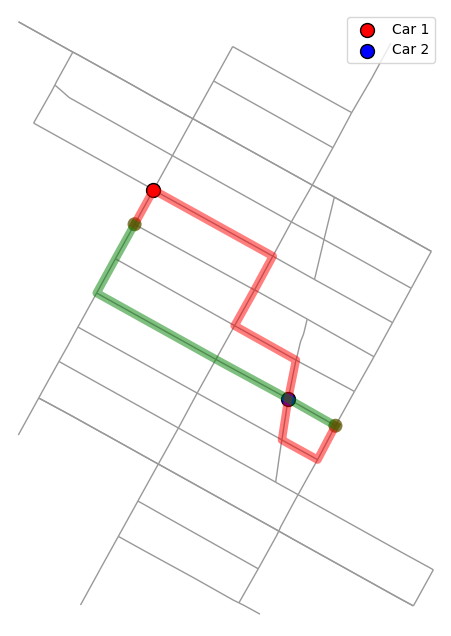

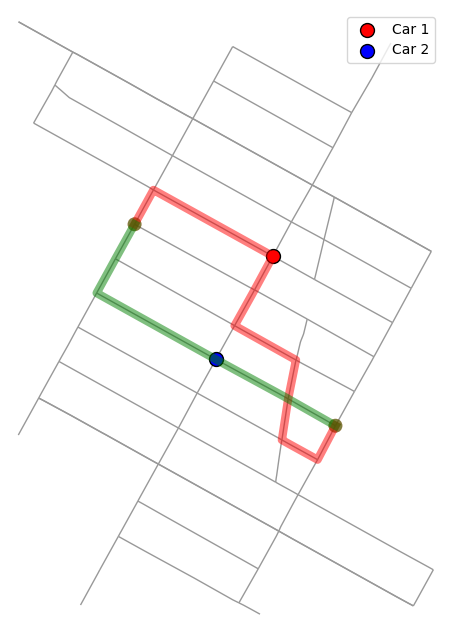

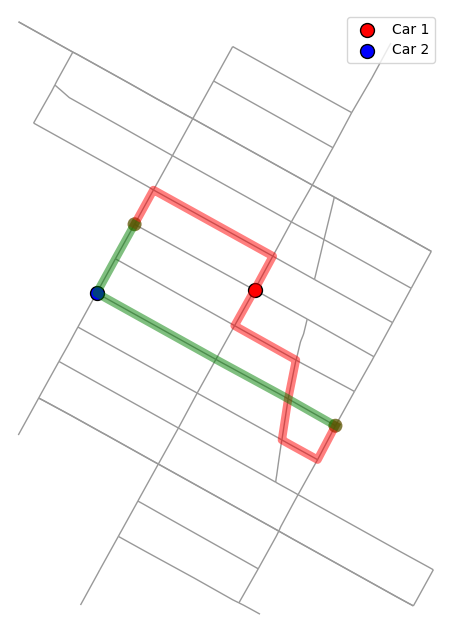

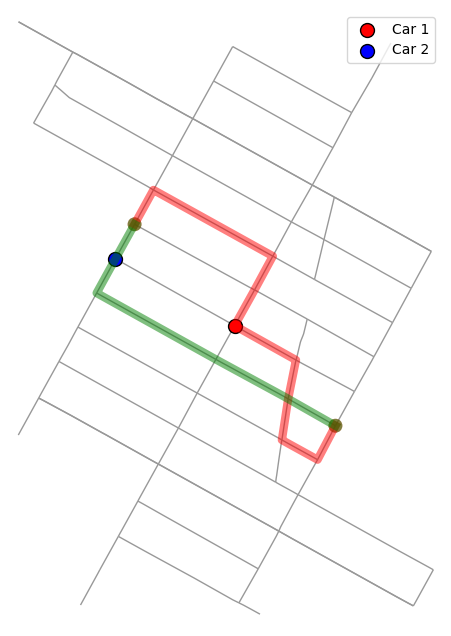

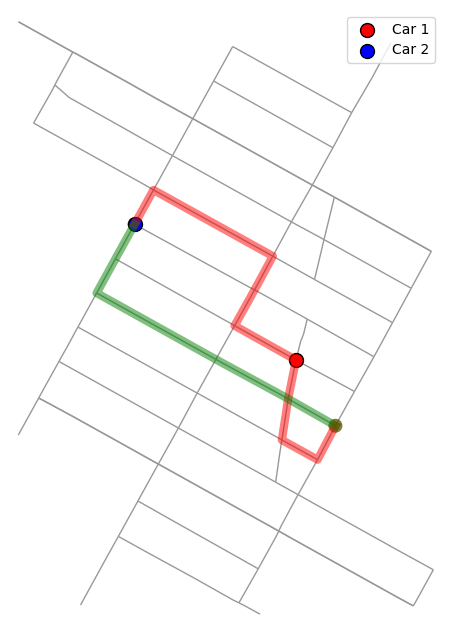

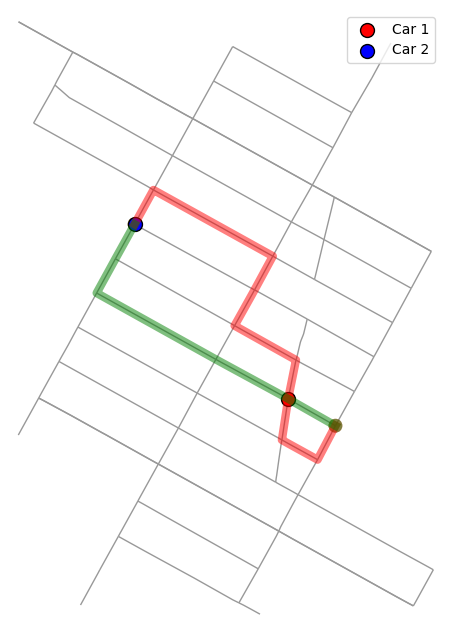

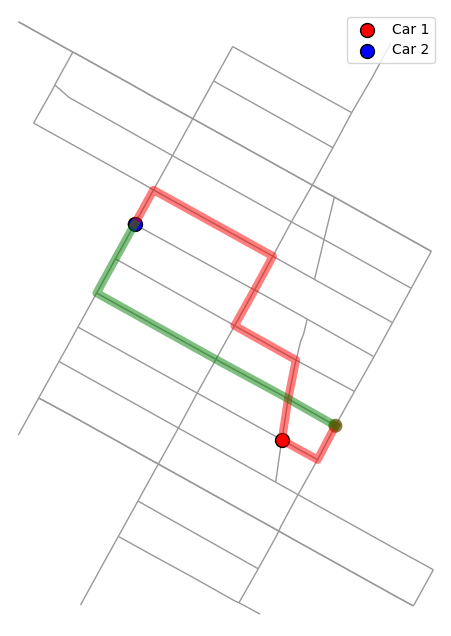

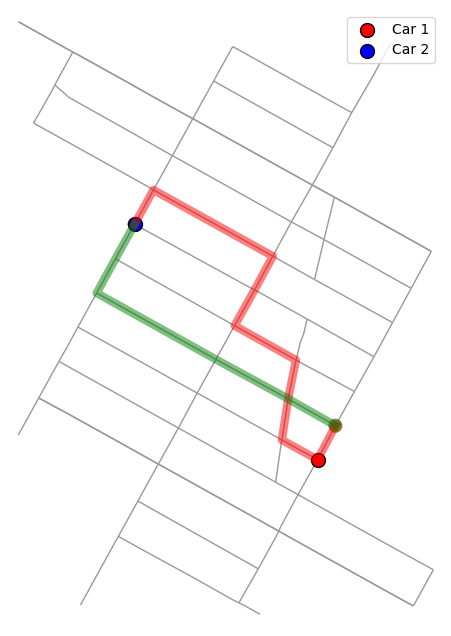

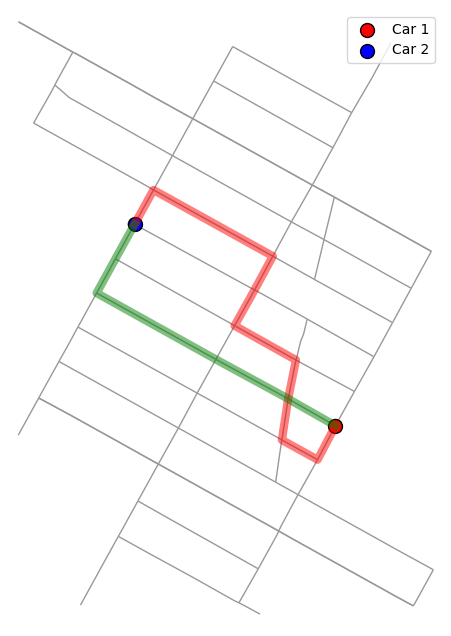

Both vehicles have reached their destinations.


In [15]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import time

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Get the nodes closest to the start and end points for both cars
start_point_1 = (40.755, -73.990)  # Car 1 start point
end_point_1 = (40.751, -73.985)  # Car 1 end point

start_point_2 = (40.751, -73.985)  # Car 2 start point
end_point_2 = (40.755, -73.990)  # Car 2 end point

start_node_1 = ox.distance.nearest_nodes(G, X=start_point_1[1], Y=start_point_1[0])
end_node_1 = ox.distance.nearest_nodes(G, X=end_point_1[1], Y=end_point_1[0])

start_node_2 = ox.distance.nearest_nodes(G, X=start_point_2[1], Y=start_point_2[0])
end_node_2 = ox.distance.nearest_nodes(G, X=end_point_2[1], Y=end_point_2[0])

# Calculate the shortest path for both cars
route_1 = nx.shortest_path(G, source=start_node_1, target=end_node_1, weight="length")
route_2 = nx.shortest_path(G, source=start_node_2, target=end_node_2, weight="length")


# Function to plot the graph and the vehicles' positions
def plot_vehicles(G, route_1, route_2, position_1, position_2):
    fig, ax = ox.plot_graph_route(
        G,
        route_1,
        route_linewidth=6,
        node_size=0,
        show=False,
        close=False,
        bgcolor="white",
    )
    ox.plot_graph_route(
        G,
        route_2,
        route_linewidth=6,
        node_size=0,
        show=False,
        close=False,
        ax=ax,
        route_color="green",
    )
    ax.scatter(
        position_1[1], position_1[0], c="red", s=100, edgecolors="black", label="Car 1"
    )
    ax.scatter(
        position_2[1], position_2[0], c="blue", s=100, edgecolors="black", label="Car 2"
    )
    plt.legend()
    plt.show()


# Get the maximum length of the routes
max_len = max(len(route_1), len(route_2))

# Simulate the vehicles' movement along their routes
for i in range(max_len):
    # Get the current positions of both cars
    if i < len(route_1):
        position_1 = (G.nodes[route_1[i]]["y"], G.nodes[route_1[i]]["x"])
    else:
        position_1 = (G.nodes[route_1[-1]]["y"], G.nodes[route_1[-1]]["x"])

    if i < len(route_2):
        position_2 = (G.nodes[route_2[i]]["y"], G.nodes[route_2[i]]["x"])
    else:
        position_2 = (G.nodes[route_2[-1]]["y"], G.nodes[route_2[-1]]["x"])

    # Plot the vehicles on the graph
    plot_vehicles(G, route_1, route_2, position_1, position_2)
    time.sleep(1)  # Delay to simulate movement

print("Both vehicles have reached their destinations.")